### IDs:
Insert yours IDs to the cell below

ID #1:

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [563]:
from scipy.stats import pearsonr,spearmanr,kendalltau
%pylab inline
import seaborn as sns
import pandas as pd
n=50

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

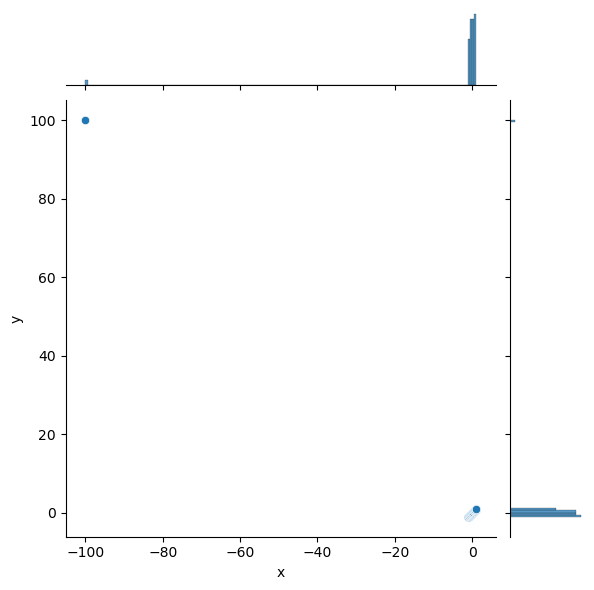

In [564]:
r = np.c_[np.linspace(-1,1,n-1),np.linspace(-1,1,n-1)]
r = np.r_[r,np.array([[-100,100]])]
sns.jointplot(pd.DataFrame(r,columns=['x','y']),x='x',y='y',kind = "scatter")

In [52]:
pearson, _ = pearsonr(r[:,0],r[:,1])
pearson

-0.9965337954939341

In [53]:
pearson_n_minus_1, _ = pearsonr(r[:-1,0],r[:-1,1])
pearson_n_minus_1

0.9999999999999998

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

Impossible. 
rho=1 means all pairs are ordered by rank for both elements. If we remove a single pair the order between the rest of the pairs will remain and we will still get rho=1. 

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

In [565]:
np.roll(np.arange(n),5)

array([45, 46, 47, 48, 49,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [566]:
r=np.c_[np.arange(n),np.roll(np.arange(n),20)]

In [567]:
kendalltau(r[:,0],r[:,1])[0],spearmanr(r[:,0],r[:,1])[0]

(0.020408163265306124, -0.4405762304921968)

In [568]:
assert kendalltau(r[:,0],r[:,1])[0]>spearmanr(r[:,0],r[:,1])[0]+0.45

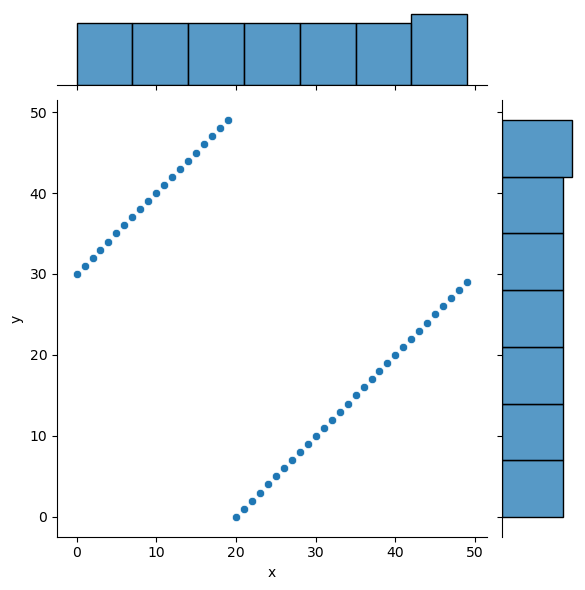

In [569]:
sns.jointplot(pd.DataFrame(r,columns=['x','y']),x='x',y='y',kind = "scatter")

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

In [162]:
np.roll(np.arange(n),1)

array([49,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [195]:
r=np.c_[
    np.arange(n),
    np.arange(n),
]
r[:n//3,1] = r[:n//3,1][::-1]
r[n//3:2*n//3,1] = r[n//3:2*n//3,1][::-1]
r[2*n//3:,1] = r[2*n//3:,1][::-1]

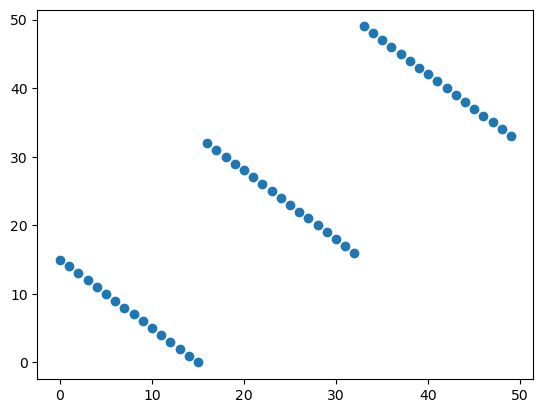

In [196]:
plt.scatter(r[:,0],r[:,1])

In [197]:
assert kendalltau(r[:,0],r[:,1])[0] < spearmanr(r[:,0],r[:,1])[0] - 0.45

AssertionError: 

In [198]:
kendalltau(r[:,0],r[:,1])[0] , spearmanr(r[:,0],r[:,1])[0]

(0.36, 0.7779591836734694)

In [199]:
kendalltau(r[:,0],r[:,1])[0] - spearmanr(r[:,0],r[:,1])[0]

-0.4179591836734694

Closest I managed to get to...

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [231]:
r=np.r_[
    np.c_[
        np.linspace(0,1,n-1),
        np.linspace(0,1,n-1),
    ],
    np.array([[1,-100]])
]

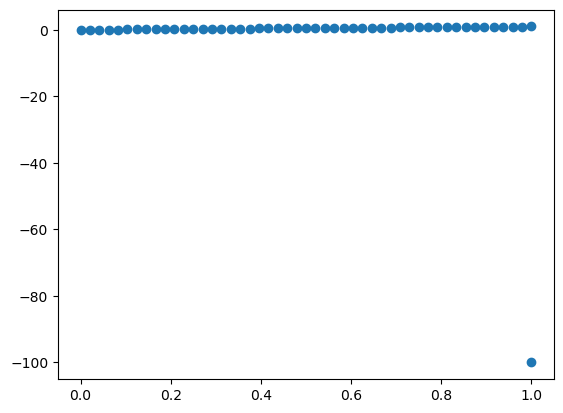

In [232]:
plt.scatter(r[:,0],r[:,1])

In [233]:
pearsonr(r[:,0],r[:,1])[0] , spearmanr(r[:,0],r[:,1])[0]

(-0.21316987335382057, 0.8847271245557211)

In [234]:
assert pearsonr(r[:,0],r[:,1])[0] < spearmanr(r[:,0],r[:,1])[0] - 0.6

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

Same as 1.D...

In [245]:
r=np.r_[
    np.c_[
        np.arange(n-1),
        -np.arange(n-1),
    ],
    np.array([[10000,10000]])
]
# r[:n//3,1] = r[:n//3,1][::-1]
# r[n//3:2*n//3,1] = r[n//3:2*n//3,1][::-1]
# r[2*n//3:,1] = r[2*n//3:,1][::-1]

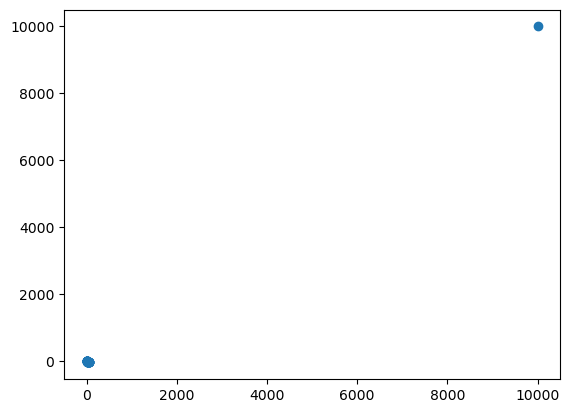

In [246]:
plt.scatter(r[:,0],r[:,1])

In [247]:
pearsonr(r[:,0],r[:,1])[0] , spearmanr(r[:,0],r[:,1])[0]

(0.9998000176946715, -0.8823529411764706)

In [248]:
assert pearsonr(r[:,0],r[:,1])[0] > spearmanr(r[:,0],r[:,1])[0] + 1.2

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

In [254]:
# r=np.c_[np.arange(n),np.arange(n)]
r=np.c_[
    np.arange(n),
    np.arange(n),
]
r[:n//3,1] = r[:n//3,1][::-1]
r[n//3:2*n//3,1] = r[n//3:2*n//3,1][::-1]
r[2*n//3:,1] = r[2*n//3:,1][::-1]

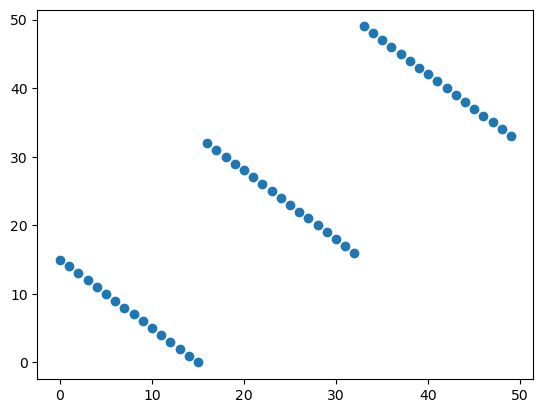

In [255]:
plt.scatter(r[:,0],r[:,1])

In [256]:
kendalltau(r[:,0],r[:,1])[0] , spearmanr(r[:,0],r[:,1])[0]

(0.36, 0.7779591836734694)

In [253]:
assert kendalltau(r[:,0],r[:,1])[0] < spearmanr(r[:,0],r[:,1])[0] - 1.2

AssertionError: 

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


#### Import and handle missing values

In [56]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import itertools
import matplotlib.pyplot as plt

#Some SNS settings
palette = itertools.cycle(sns.color_palette(palette="flare", n_colors=6))
sns.set_theme(context='notebook', style='darkgrid', palette='deep')
%matplotlib inline

DF = pd.read_csv('heart.csv',sep='\t')
DF.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1


Immediatelly we can see some missing values. We will use the median in numerical features and mode for categorical feature (sex, cp, fbs, restecg, exang, slope, thal, target).

In [57]:
#Define categorical ana numerical features
cat_features = ['sex', 'cp', 'fbs', 'restecg','exang','slope','thal','target','ca']
numeric_features = [feature for feature in DF.columns if feature not in cat_features]

#Fill NA values
DF[cat_features] = DF[cat_features].fillna(DF[cat_features].mode().iloc[0])
DF[numeric_features] = DF[numeric_features].fillna(DF[numeric_features].median())

#Set categorical features as dtype=int
DF[cat_features] = DF[cat_features].astype('category')

In [3]:
DF.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,0.0,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,130.0,240.0,0.0,0.0,172.0,0,1.4,2,0,2,1
3,55.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    float64 
 4   chol      303 non-null    float64 
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    float64 
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(9), float64(5)
memory usage: 16.0 KB


We now have 13 features of which 8 are categorical and 5 are numerical.
The target variable is categorical as well.
We can see that there are no missing values.

#### Numerical Feature Description
Beginning with numerical features, we will plot the distribution and use MLE to plot a fit to the distribution.

In [5]:
DF.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,131.630363,245.848185,149.610561,1.036634
std,8.964069,17.358758,51.604360,22.858624,1.158160
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


We will now implement a function that finds the best fitting distribution using the scipy.stats fit function and returns the best fitting distribution from the following continous distributions: norm, lognorm, exponential.

In [85]:
def fit_distribution(data, expon):
    dist_types = ["norm", "lognorm", "expon"]
    params = {}
    results = {}
    
    for dist_type in dist_types:
        dist = getattr(st, dist_type)
        params[dist_type] = dist.fit(data, method='mle') #run MLE
        
        #compute p-val
        d, _ = st.kstest(data, dist_type, args = params[dist_type])
        results[dist_type] = d
    
    #select distribution with max p-value
    best_fit = min(results, key=results.get)
    return best_fit, results[best_fit], params[best_fit]

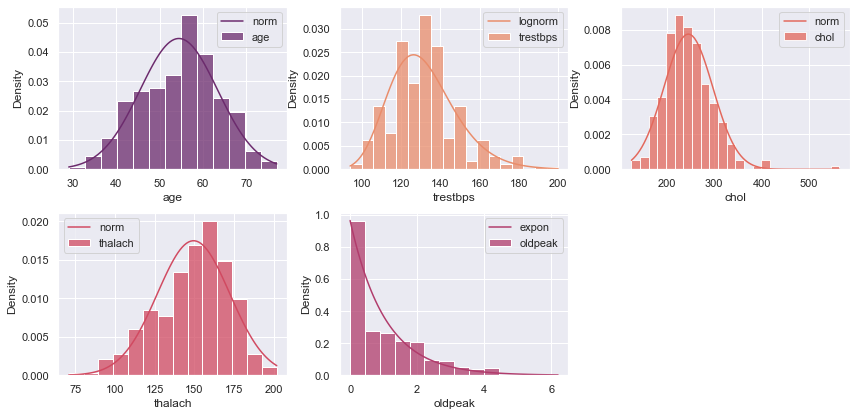

In [91]:
#find the best fitting distrubution

#set figure
fig, axs = plt.subplots(2, 3, figsize = (12, 6))
fig.tight_layout(pad=2.0)
fig.delaxes(axs[1, 2])

#plot histograms and distributions
for i in range(len(numeric_features)):
    c = next(palette)
    ax = axs[i//3, i%3]
    sns.histplot(data=DF, x=numeric_features[i], stat="density", color = c, ax = ax)
    
    #find the best fitting distribution
    dist_type, _, dist_params = fit_distribution(DF[numeric_features[i]])
    dist = getattr(st, dist_type)
    
    #manually change the last one..
    if (i == 4):
        dist_type = 'expon'
        dist = getattr(st, dist_type)
        dist_params = dist.fit(DF[numeric_features[i]], method='mle')
    
    #plot distribution
    x = np.linspace(min(DF[numeric_features[i]]), max(DF[numeric_features[i]]), 100)
    y = dist.pdf(x, *dist_params)
    ax.plot(x, y, color = c)
    ax.legend([str(dist_type), numeric_features[i]])
    


#### Healthy \ Sick population mean
We will constrcut a new RV which corresponds to the difference between sick and healthy population for each feature, so that $X \sim Norm(\Delta \mu, \sigma_h^2 + \sigma_s^2)$ where $\delta \mu$ is the difference in mean between populations and $\sigma_h^2,  \sigma_s^2$ are the variances in the healthy and sick populations.

We will compute a CI for a confidence score of $P-val = 0.95$. We find that 0 is within the CI for the "age", "trestbps", "chol", and "thalach" features. 
For these features, based on the computed CI, the difference in means can be 0.

In [115]:
numeric_significants = pd.DataFrame(columns = ['mean-delta', 'CI'])

for feature in numeric_features:
    #find the sick and healthy population
    healthy_population = DF[feature][DF['target'] == 0]
    sick_population = DF[feature][DF['target'] == 1]
    
    delta = np.mean(healthy_population) - np.mean(sick_population)
    var = np.var(sick_population) + np.var(sick_population)
    n = len(feature) - 2
    
    CI = delta + np.array([-1, 1]) * st.norm.ppf(.95) * sqrt(var / n)
    numeric_significants.loc[feature] = [delta, CI]
    
numeric_significants

,mean-delta,CI
age,4.151515,"[-17.595575508565805, 25.898605811596102]"
trestbps,5.083399,"[-9.885985109350276, 20.052783528322625]"
chol,8.675494,"[-78.5985844806481, 95.94957262294056]"
thalach,-19.351779,"[-39.22287518594145, 0.5193178736884541]"
oldpeak,0.982648,"[0.17358708112478016, 1.7917093615629682]"


##### Numerical features vs. age
We will separate the "Age" feature into 4 bins of equal size: (28.999, 48], (48, 55], (55, 61], (61, 77],
and plot the violin plot of each of the numeric features for each bin while splitting acording to the target.

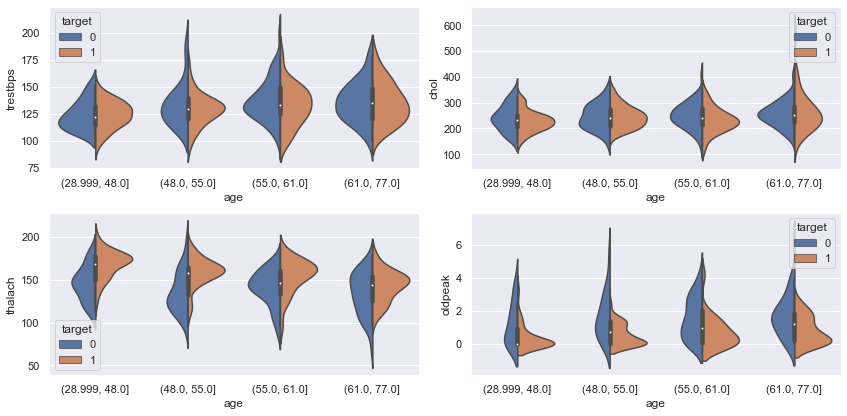

In [94]:
#set figure
fig, axs = plt.subplots(2, 2, figsize = (12, 6))
fig.tight_layout(pad=2.0)

#quantile-cut age into 4
age_bins = pd.qcut(DF['age'], 4)

#plot for each numeric feature
i=0
for feature in numeric_features:
    if feature != 'age':
        ax = axs[i//2, i%2]
        sns.violinplot(data=DF, y=feature, x = age_bins, hue="target", split=True, ax=ax)
        i+=1

#### Correlations between numerical features
We begin by calcaulting the pearson correlation between numerical features along with the p-value. We will only plot significant values in the heatmap with $p<=0.05$. The p-value is given by the scipy implementation of the Fisher transform.

In [95]:
DF[numeric_features]

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,37.0,130.0,250.0,187.0,3.5
2,41.0,130.0,240.0,172.0,1.4
3,55.0,120.0,236.0,178.0,0.8
4,55.0,120.0,354.0,163.0,0.6
...,...,...,...,...,...
298,55.0,140.0,240.0,123.0,0.2
299,55.0,110.0,264.0,132.0,0.8
300,68.0,144.0,193.0,153.0,3.4
301,57.0,130.0,131.0,115.0,1.2


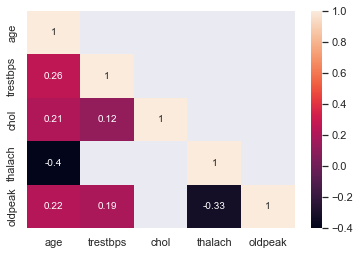

In [96]:
def calculate_pearson_matrix (data):
    cols = data.columns
    n = len(cols)
    numeric_corr = np.zeros([n, n, 2])

    for i, j in [(i, j) for i in range(n) for j in range(n)]:
        numeric_corr[i,j,:] = st.pearsonr(data[cols[i]],data[cols[j]]) #rho, p-val
    
    mask = np.tril(np.ones([n,n]),-0).astype(bool) * (numeric_corr[:,:,1] <= 0.05)
    return numeric_corr, mask

numeric_corr, mask = calculate_pearson_matrix(DF[numeric_features])
sns.heatmap(numeric_corr[:,:,0], annot = numeric_corr[:,:,0], mask = ~mask,
           xticklabels = numeric_features, 
           yticklabels = numeric_features);

In [97]:
numeric_corr = np.round(numeric_corr, 5)
print(numeric_corr[3,0], numeric_corr[4,3])

[-0.40167  0.     ] [-0.33006  0.     ]


We will focus on "thalach" and "oldpeak" which have a Pearson coefficient of -0.4 and $Pval<<0.01$, and "thalach" and "age" which have a pearson coeffieicnt of -0.33 and $Pval<<0.01$.

##### Jointplots

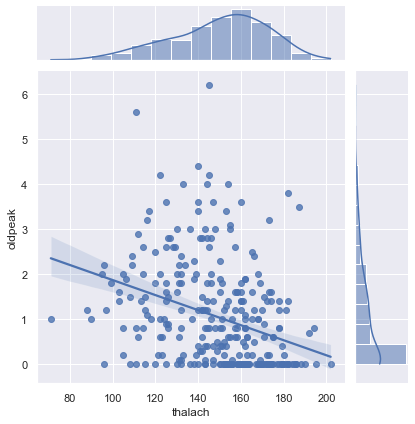

In [98]:
sns.jointplot(data = DF, x = 'thalach', y = 'oldpeak', ax = axs[0], kind = 'reg');

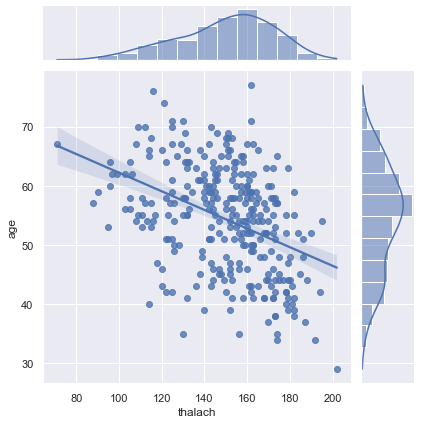

In [120]:
sns.jointplot(data = DF, x = 'thalach', y = 'age', ax = axs[0], kind = 'reg');

##### Bivariate normal fits

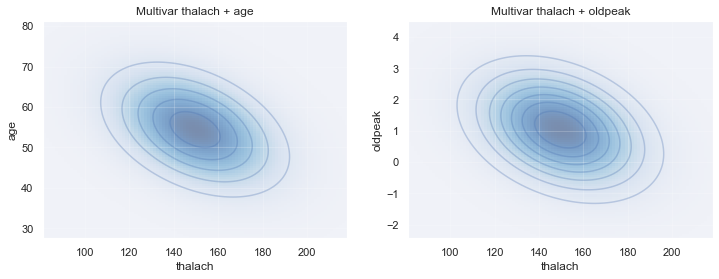

In [99]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn

def plot_2d_Gaussian_pdf(means, cov, ax):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape), #levels=[0.05, 0.1, 0.15, 0.2],
               alpha=0.3, colors='b')
    #ax.axis('equal')
    ax.grid(alpha=0.2)
    
#call subpluts
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

#thalach - age
for f1,f2,i in [('thalach', 'age',0), ('thalach','oldpeak',1)]:
    means = np.mean([DF[f1], DF[f2]] , axis=1)
    cov = np.cov([DF[f1], DF[f2]])
    plot_2d_Gaussian_pdf(means, cov, ax[i])
    ax[i].set_xlabel(f1)
    ax[i].set_ylabel(f2)
    ax[i].set_title('Multivar '+f1+' + '+f2);
plt.show()

#### Correlations in Males Vs. Females and Sick vs. Healthy
We will compute the correlation matrix (pearson) for each case of the categorical variable and compute the significance of each of the correlation coefficients.

We will plot a heat-map of the Pearson correlations, only in those cases where for one population the correlation was insignificant $P>0.05$ and for the other is significant $P<=0.05$, or vice versa.

In other words, we eliminate the cases where the significance level hasn't changed.

In [100]:
def pval_change(matrix1, matrix2, pval):
    #returns the mask which represents where there has been a change from 
    #significant to non-significant or vice versa
    
    mask = ((matrix1 <= pval) * (matrix2 > pval)) + (
    (matrix1 > pval) * (matrix2 <= pval))
    
    mask *= np.tril(np.ones(matrix1.shape[0:2]),0).astype(bool)
    return mask

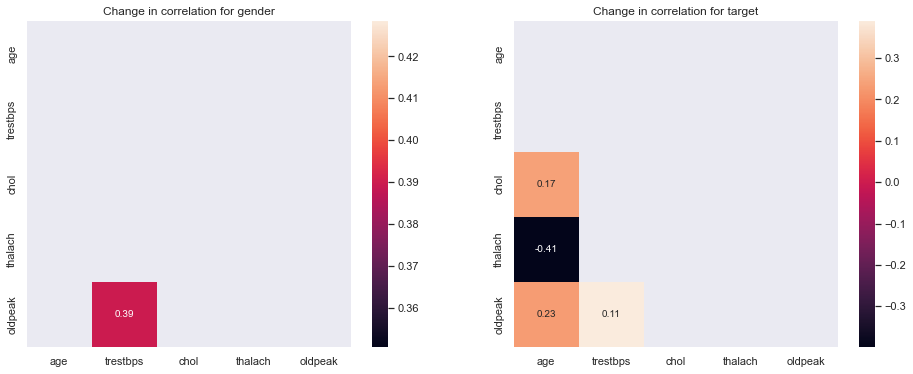

In [101]:
#compute the correlation matrices for gender
corr_gen0, _ = calculate_pearson_matrix(DF[numeric_features][DF['sex'] == 0])
corr_gen1, _ = calculate_pearson_matrix(DF[numeric_features][DF['sex'] == 1])

#and for target variable
corr_target0, _ = calculate_pearson_matrix(DF[numeric_features][DF['target'] == 0])
corr_target1, _ = calculate_pearson_matrix(DF[numeric_features][DF['target'] == 1])

#compare p-values which were non significant and now are, or vice versa
mask_gen = pval_change(corr_gen0[:,:,1], corr_gen1[:,:,1], 0.05)
mask_target = pval_change(corr_target0[:,:,1], corr_target1[:,:,1], 0.05)

#plot
fig, axs = plt.subplots(1, 2, figsize = (16, 6))
sns.heatmap(corr_gen0[:,:,0], annot = corr_gen0[:,:,0],
           xticklabels = numeric_features, mask = ~mask_gen,
           yticklabels = numeric_features, ax = axs[0]);
sns.heatmap(corr_gen0[:,:,0], annot = corr_gen1[:,:,0],
           xticklabels = numeric_features, mask = ~mask_target,
           yticklabels = numeric_features, ax = axs[1]);
axs[0].set_title('Change in correlation for gender');
axs[1].set_title('Change in correlation for target');

#### Categorical feature discription

In [9]:
DF.describe(include='category')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303,303,303,303,303
unique,2.0,4.0,2.0,3.0,2,3,5,4,2
top,1.0,0.0,0.0,1.0,0,2,0,2,1
freq,208.0,145.0,258.0,153.0,204,142,175,166,165


We have 8 categorical features and the target variable is also categorical (sick or healthy).

##### Mean of sick and healthy population vs. gender
(Original question) We will use the T-test to check wether there is a significat difference in the mean age of sick and healthy men and women. First, we will plot the data:

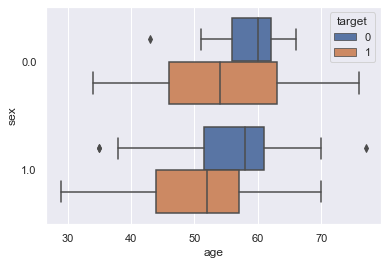

In [75]:
sns.boxplot(data=DF, x="age", y="sex", hue="target");

Next, we will preform a T-test for both groups:


In [111]:
healthy_gen0 = DF['age'][DF['target'] == 0][DF['sex'] == 0]
healthy_gen1 = DF['age'][DF['target'] == 0][DF['sex'] == 1]
sick_gen0 = DF['age'][DF['target'] == 1][DF['sex'] == 0]
sick_gen1 = DF['age'][DF['target'] == 1][DF['sex'] == 1]

#assert (DF.shape[0] == healthy_gen0.shape[0]+healthy_gen1.shape[0]+sick_gen0.shape[0]+sick_gen1.shape[0])

#compute t-score
_, healthy_p = np.round(st.ttest_ind(healthy_gen0, healthy_gen1),3)
_, sick_p = np.round(st.ttest_ind(sick_gen0, sick_gen1),3)
print('The p_value for the healthy group is:',healthy_p,
      ', and for the sick group:',sick_p,'.')

The p_value for the healthy group is: 0.16 , and for the sick group: 0.01 .


We can conclude that there is a  difference between the mean age of sick women and sick men with a significance level of $p=0.01$, while the difference in mean in the control (healthy) group is not significant.

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

!!!!!!
Not sure how to prove..

The log normal distribution doesn't have a heavy right tail because the term inside the limit is:
$e^{tx}\int_x^\infty{\frac{dx}{x\sqrt{2\pi}\sigma}e^{-\frac{(ln(x)-\mu)^2}{\sigma^2}}}$ and it diverges in the limit 

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

$$
P(X_1<X_2)=
\int CDF_1(x)(1-CDF_2(x))dx=
\int_0^\infty dx(1-e^{-\lambda_1x})e^{-\lambda_2x}=
\int_0^\infty dx e^{-\lambda_2x}-e^{-(\lambda_1+\lambda_2)x}=
\frac{1}{\lambda_2} - \frac{1}{\lambda_1+\lambda_2}
$$

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [39]:
import numpy as np
%pylab inline
T_default=np.array([
[0.4 , 0.2 , 0.1 , 0 , 0.1 , 0.2],
[0.2 , 0.4 , 0.2 , 0.1 , 0 , 0.1],
[0.1 , 0.2 , 0.4 , 0.2 , 0.1 , 0],
[0 , 0.1 , 0.2 , 0.4 , 0.2 , 0.1],
[0.1 , 0 , 0.1 , 0.2 , 0.4 , 0.2],
[0.2 , 0.1 , 0 , 0.1 , 0.2 , 0.4],
])

w,v=np.linalg.eig(T_default)
eigv = v[0,:]
print(v)
print(eigv/np.linalg.norm(eigv))
print(np.dot(T_default,eigv)/np.linalg.norm(eigv))

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
[[ 0.40824829  0.57735027  0.57735027  0.40824829  0.14395445  0.0260495 ]
 [ 0.40824829  0.28867513 -0.28867513 -0.40824829  0.55618569 -0.51251556]
 [ 0.40824829 -0.28867513 -0.28867513  0.40824829  0.41223124  0.48646606]
 [ 0.40824829 -0.57735027  0.57735027 -0.40824829 -0.14395445  0.0260495 ]
 [ 0.40824829 -0.28867513 -0.28867513  0.40824829 -0.55618569 -0.51251556]
 [ 0.40824829  0.28867513 -0.28867513 -0.40824829 -0.41223124  0.48646606]]
[0.40394863 0.57126963 0.57126963 0.40394863 0.14243832 0.02577515]
[0.3523592  0.46652388 0.4781902  0.36402552 0.24044191 0.21710927]


#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [29]:
np.eye(6)[:,1]

array([0., 1., 0., 0., 0., 0.])

In [30]:
N=1000
np.random.seed(5)

In [31]:
Pi0_default = (np.ones(6) / 6)
Pi0_default

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [32]:
def generate_first_location(pi0=Pi0_default):
    probability_vec = pi0
    cdf = probability_vec.cumsum()
    loc = (cdf>= np.random.rand()).argmax()
    return np.eye(6)[:,loc]

In [36]:
def generate_next_step(loc,T=T_default):
    probability_vec = np.dot(T,loc)
    cdf = probability_vec.cumsum()
    new_loc = (cdf>= np.random.rand()).argmax()
    return np.eye(6)[:,new_loc]

In [34]:
def generate_trajectory(steps=30,pi0=Pi0_default,T=T_default):
    loc_list = [generate_first_location(pi0)]
    for _ in range(steps-1):
        loc_list.append(generate_next_step(loc_list[-1],T))
    return np.c_[loc_list]

In [37]:
experiment = np.c_[[generate_trajectory() for _ in range(N)]]
experiment.shape # [trajectory,step,location]

(1000, 30, 6)

Due to the simmerty of the initial draw and the transition matrix, I would expect the average value to be the mean of 1 to 6 (3.5)

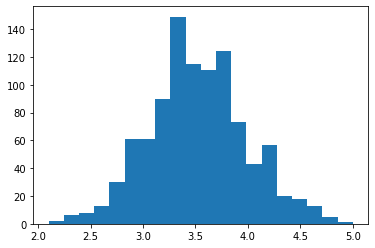

In [40]:
tranjectory_means = (experiment * np.arange(1,7)).sum(axis=2).mean(axis=1)
plt.hist(tranjectory_means, bins=20 );

The distribution looks gaussian 

In [41]:
tranjectory_means.mean()

3.5265

In [42]:
tranjectory_means.std()

0.4664701669631903

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [43]:
experiment_b = np.c_[[generate_trajectory(500) for _ in range(N)]]
experiment_b.shape # [trajectory,step,location]

(1000, 500, 6)

In [44]:
tranjectory_means_b = (experiment_b * np.arange(1,7)).sum(axis=2).mean(axis=1)


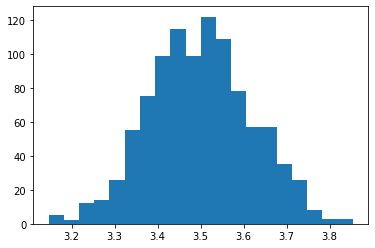

In [45]:
plt.hist(tranjectory_means_b,bins=20);

Also looks like a gaussian

In [508]:
tranjectory_means_b.mean()

3.0024859999999998

In [509]:
tranjectory_means_b.std()

0.048489089535688285

#### 4.C
Draw normal fit curves on your two histograms.

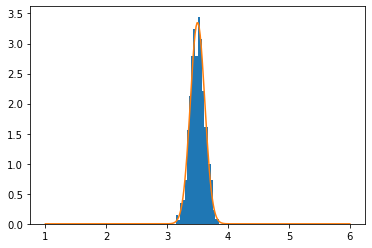

In [53]:
from scipy.stats import norm 
plt.hist(tranjectory_means_b,bins=20, density = True);
miu,sigma = norm.fit(tranjectory_means_b)
plt.plot(np.linspace(1,6,300),norm(loc=miu,scale=sigma).pdf(np.linspace(1,6,300)));

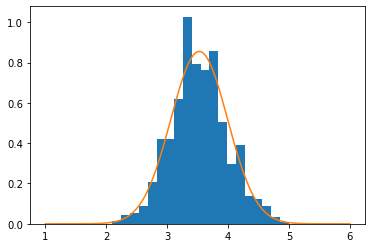

In [52]:
from scipy.stats import norm 
plt.hist(tranjectory_means,bins=20, density = True);
miu,sigma = norm.fit(tranjectory_means)
plt.plot(np.linspace(1,6,300),norm(loc=miu,scale=sigma).pdf(np.linspace(1,6,300)));

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [541]:
def get_cov_of_0_with_all_available_i(experiment): 
    experiment_red = (experiment * np.arange(1,7)).sum(axis=2) # [tranjectory,step] each location contains the value (integer from 1 to 6)
    return np.cov(experiment_red.T)[0,1:]

In [546]:
get_cov_of_0_with_all_available_i(experiment_b).shape

(499,)

In [547]:
def get_cov_from_1_to_1000_based_on_pi0_and_T(pi0=Pi0_default,T=T_default,N=1000):
    experiment = np.c_[[generate_trajectory(steps=500,pi0=pi0,T=T) for _ in range(N)]]
    return get_cov_of_0_with_all_available_i(experiment)
cov_from_1_to_500 = get_cov_from_1_to_1000_based_on_pi0_and_T()

In [548]:
cov_from_1_to_500

array([ 4.95065065e-02, -2.52752753e-03, -4.95985986e-02, -8.53753754e-03,
        1.29135135e-01,  9.65815816e-02,  9.00820821e-02,  7.95945946e-02,
       -7.30850851e-02, -1.45255255e-02, -4.45795796e-02, -4.35285285e-02,
        3.50390390e-02,  9.35785786e-02,  8.55465465e-02, -2.20480480e-02,
       -4.90110110e-02, -6.15065065e-02, -8.45815816e-02, -2.40260260e-02,
       -1.14824825e-02,  7.00900901e-02,  2.10410410e-02, -7.65235235e-02,
       -5.54804805e-02, -7.45275275e-02, -2.44894895e-02, -2.35085085e-02,
       -3.25115115e-02, -6.61081081e-02,  5.50350350e-02,  1.14098098e-01,
        1.00420420e-02, -9.55665666e-02, -7.70130130e-02, -1.35245245e-02,
        2.65655656e-02,  5.30570571e-02, -6.21221221e-02,  1.46659660e-01,
       -2.60760761e-02, -3.80820821e-02,  2.09969970e-02, -6.75685686e-02,
        7.85975976e-02,  4.98698699e-03, -8.75785786e-02, -8.55865866e-02,
        1.64854855e-02, -9.46946947e-04,  4.30470470e-02, -3.60020020e-02,
        1.34884885e-02, -

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

1. For $R=0$ we require that there be no $a_i > q$, and there are n times $a_i= 	\leq  q$. For that, $P(R=0) = 0.2^n$ and since $n \geq 100, P(R=0) \sim 0$.

2. $R \sim  Binom (p = 0.8, n).$ Because $n \geq 100$, we can use the gaussian approximation: $R \sim Norm(n*p, n*p(1-p))$.
3. p(alpha < R) >= 0.9 ?
